In [1]:
import contextily as ctx
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
STATION_LABEL_MAP = {
    'BOVDCH': 'Chandel M/13',
    'BOVDMR': 'Morges',
    'BOVDSO': 'Sorges',
    'NABLAU': 'Lausanne César-Roux',
    'PUY': 'Pully',
    'WSLLAB': 'Lausanne Bestand',
    'WSLLAF': 'Lausanne Freiland',
    'VD_Lausanne_PdL': 'Lausanne Plaines-du-Loup',
    'VD_Bussigny': 'Bussigny',
    'VD_Morges': 'Morges',
    'BOURG-EN-LAVAUX': 'Bourg-en-Lavaux',
    'MARCELIN': 'Marcelin',
    'PULLY': 'Pully'
}
CRS ='epsg:2056'
WEB_MERCATOR_CRS = 'epsg:3857'

In [3]:
station_locations_filepath = '../data/raw/stations/station-locations.csv'

In [4]:
station_location_df = pd.read_csv(station_locations_filepath)

In [5]:
station_gdf = gpd.GeoDataFrame(
    station_location_df[station_location_df.drop(['x', 'y'], axis=1).columns],
    geometry=gpd.points_from_xy(station_location_df['x'],
                                station_location_df['y']),
    crs=CRS)
station_gdf['label'] = station_gdf['stn'].replace(
    STATION_LABEL_MAP
) + ' (' + station_gdf['src'] + '), ' + station_gdf['alt'].astype(str) + ' m'

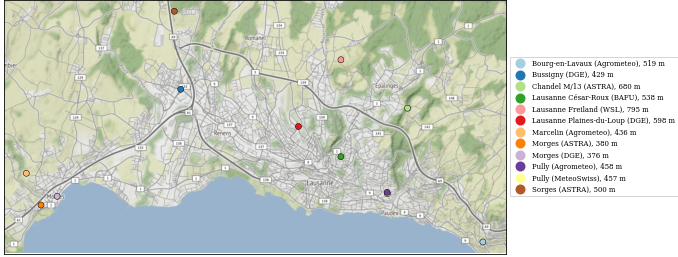

In [6]:
fig, ax = plt.subplots(figsize=(9, 6))

# set black edge color for markers
plt.rcParams.update(**{'scatter.edgecolors': 'k'})

# station_gdf.to_crs(WEB_MERCATOR_CRS).plot(ax=ax, column='src', legend=True)
station_gdf.to_crs(WEB_MERCATOR_CRS).plot(ax=ax,
                                          column='label',
                                          cmap='Paired',
                                          linewidths=.5,
                                          legend=True,
                                          legend_kwds={
                                              'fontsize': 'x-small',
                                              'fancybox': True,
                                              'loc': 'center right',
                                              'bbox_to_anchor': (1.35, .5)
                                          })
ctx.add_basemap(ax, attribution=False)
ax.set_xticks([])
ax.set_yticks([])
fig.savefig('../reports/figures/station-locations.pdf')